In [1]:
import numpy as np
import pandas as pd



In [2]:
a = np.array([1,2,3])
b = np.array([4,5,6])
def f(a1, a2):
    return a1+a1

map(f, a, b)

In [3]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
a*b

array([2, 4, 6])

In [4]:
a = np.array([[1,-2,3],[3,-1,-2]])
def f(a1):
    return max(0, a1)

def f1(a1):
    return 3*f(a1)

c = np.array(list(map(f1, a.flatten('C')))).reshape(2,3)
print(c)



[[3 0 9]
 [9 0 0]]


In [5]:
a = np.array([[3,4,5], [7,8,9]])
b = np.sum(a,axis=1,keepdims=True) / 2
print(b)

[[ 6.]
 [12.]]


In [6]:
print(a.shape)
print (a.shape == (2,3))

(2, 3)
True


In [7]:
df_x = pd.read_csv("./../data/house_price/test.csv")
df_y = pd.read_csv("./../data/house_price/price.csv")
features = ['MSSubClass', 'LotFrontage', 'LotArea']
x = np.array(df_x[features].T)
y = np.array([np.array(df_y['SalePrice'].T).tolist()])

In [8]:
df_x.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [9]:
df_y.dtypes

Id             int64
SalePrice    float64
dtype: object

In [10]:
print(x)

[[   20.    20.    60. ...    20.    85.    60.]
 [   80.    81.    74. ...   160.    62.    74.]
 [11622. 14267. 13830. ... 20000. 10441.  9627.]]


In [11]:
print(y)

[[169277.0524984  187758.39398877 183583.68356955 ... 219222.42340006
  184924.279659   187741.86665748]]


In [12]:
import torch.utils.data as Data
import torchvision
train_loader = Data.DataLoader(
  torchvision.datasets.MNIST('./../data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = Data.DataLoader(
  torchvision.datasets.MNIST('./../data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

ModuleNotFoundError: No module named 'torch'

In [13]:
import numpy as np
y = np.array([[1,2,3,4]])
softmax_y = np.zeros((10, y.shape[1]))

for i in range(0, y.shape[1]):
    softmax_y[y[0,i], i] = 1

print(softmax_y)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [15]:
a = [[1,2],[3,4],[5,6]]
b = [[1,2,3,4,5,6]]
print(b[0][1])

2


### plot loss

KeyboardInterrupt: 

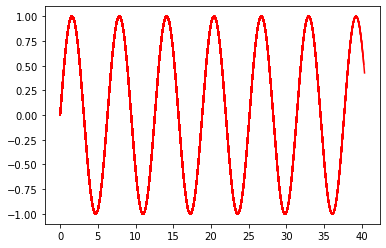

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import time
from math import *
 
plt.ion() #开启interactive mode 成功的关键函数
plt.figure(1)
t = [0]
t_now = 0
m = [sin(t_now)]
 
for i in range(2000):
     t_now = i*0.1
     t.append(t_now)#模拟数据增量流入
     m.append(sin(t_now))#模拟数据增量流入
     plt.plot(t,m,'-r')
     plt.draw()#注意此函数需要调用
     time.sleep(0.01)

In [ ]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
 from IPython import display
 
plt.ion()
 
def plot_durations(y):
 plt.figure(2)
 plt.clf()
 plt.subplot(211)
 plt.plot(y[:,0])
 plt.subplot(212)
 plt.plot(y[:,1])
 
 plt.pause(0.001) # pause a bit so that plots are updated
 if is_ipython:
  display.clear_output(wait=True)
  display.display(plt.gcf())
 
 
x = np.linspace(-10,10,500)
y = []
for i in range(len(x)):
 y1 = np.cos(i/(3*3.14))
 y2 = np.sin(i/(3*3.14))
 y.append(np.array([y1,y2]))
 plot_durations(np.array(y))

In [ ]:
ddP.max(axis=0).repeat(3)

### Save weights
+ np: np.savetxt, np.readtxt 
+ fileIO: write and read list
+ json

In [ ]:
np.loadtxt("a.txt", dtype='float64', delimiter=' ') 

In [ ]:
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

In [ ]:
list_data = [[1,2], [2,2,2],[[1,2],[3,4]]]

open(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) +'data.txt','w').write(str(list_data))


In [ ]:
file = open('data.txt','r') 
a = file.read()

In [ ]:
print(a)

In [ ]:
np.readline

In [ ]:
file = open('others.txt', 'w')
file.writelines(str([[1,2,3], 'function']))

file.close()

In [ ]:
file = open('others.txt', 'r')
arr = file.readlines()
func = file.readlines()
print(list(arr))


##### json 存储weights 

In [ ]:
import json
data = {'a': [1,2,3], 'b':[[1,2],[3,4]], 'c':'adsfa'}
js = json.dumps(data)

In [ ]:
js

In [ ]:
ddd = json.loads(js)

In [ ]:
ddd['a']

In [ ]:
ddd['b']

In [ ]:
ccc = np.array([[1,2,3],[5,5,5]])
print(ccc)
ccc[:,0] = [[9], [9]]
print(ccc)


In [ ]:
print('asdf', 'asdf')

In [ ]:
a = [[1,2,3], [12],"qwer"]

In [ ]:
del a[1:]

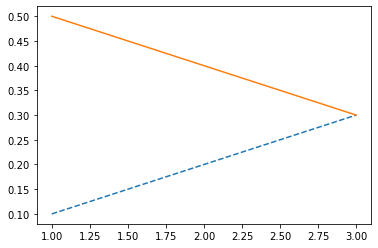

In [21]:
plt.plot([1,2,3],[0.1,0.2,0.3],'--')
plt.plot([1,2,3],[0.5,0.4,0.3],'-')
plt.annotate()
plt.show()

In [23]:
class A:
    m=1
    def aa(self, m = 0):
        print(m)
    
a =A()
a.aa()
a.aa(10)


0
10


In [37]:
a = np.array([[]])
b = np.array([[1]])

In [38]:
print(a.shape)
print(b.shape)


(1, 0)
(1, 1)


In [39]:
print(len(a))
print(len(b))

1
1


In [40]:
len([[],[]])

2